In [2]:
import sys
sys.path.insert(1, "games/")
sys.path.insert(1, "networks/")
from tic_tac_toe import TicTacToe
from tic_tac_toe_net import create_network

from model import Model

import numpy as np
np.random.seed(42)

import platform
if platform.system() == "Darwin":
    %config InlineBackend.figure_format="retina"  # For high DPI display

In [3]:
game = TicTacToe()
model = Model(create_network(game.shape, game.nb_actions), summary=True)
model.load("networks/network_tic_tac_toe.h5")

2021-12-03 20:22:46.369685: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-03 20:22:46.404713: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-03 20:22:46.404874: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-03 20:22:46.405355: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

Model: "TicTacToe_network"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 3, 3, 2)]    0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 3, 3, 128)    384         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 3, 3, 128)   512         ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                                  
 re_lu (ReLU)                   (None, 3, 3, 128)    0           ['batch_normaliza

In [4]:
state = game.get_init_state()
model.predict(state)

2021-12-03 20:22:48.655786: I tensorflow/stream_executor/cuda/cuda_dnn.cc:366] Loaded cuDNN version 8301


(array([0.11493179, 0.12519535, 0.10646656, 0.1185142 , 0.11210995,
        0.10629371, 0.11248298, 0.09680782, 0.10719769], dtype=float32),
 0.04480296)

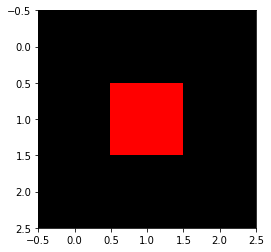

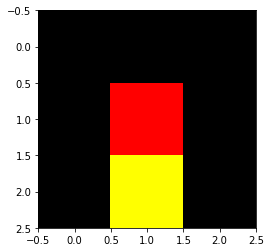

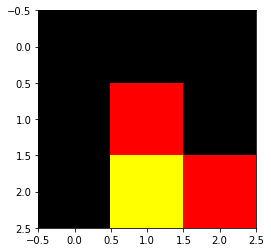

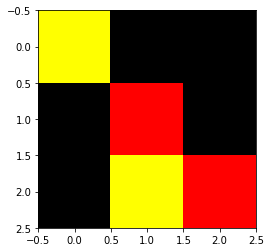

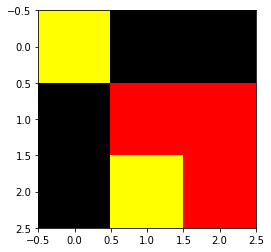

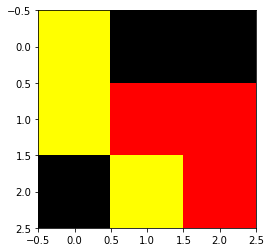

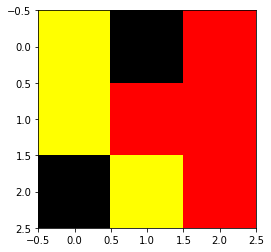

In [25]:
state = game.get_init_state()
game.play_vs_bot(model, Model(create_network(game.shape, game.nb_actions)), state, 50)

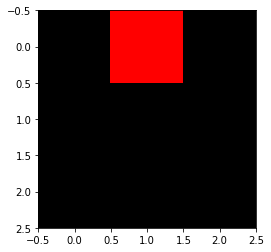

Model prediction: (array([0.11493179, 0.12519535, 0.10646656, 0.1185142 , 0.11210995,
       0.10629371, 0.11248298, 0.09680782, 0.10719769], dtype=float32), 0.04480296)
Root value: -0.010550278947145367


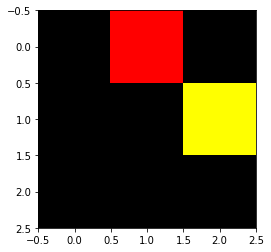

Model prediction: (array([0.1081485 , 0.11142494, 0.1188832 , 0.12007596, 0.09132326,
       0.10850074, 0.11178426, 0.10127971, 0.12857945], dtype=float32), 0.010245261)


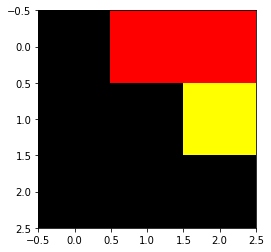

Model prediction: (array([0.11037856, 0.12944669, 0.10611283, 0.1260186 , 0.11039648,
       0.10246584, 0.11257803, 0.09425199, 0.10835096], dtype=float32), 0.027157608)
Root value: 0.22014345489054296


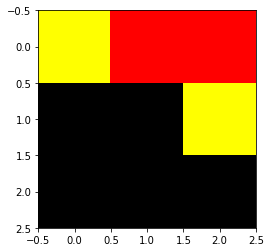

Model prediction: (array([0.11014943, 0.11622774, 0.12529753, 0.12054512, 0.08212295,
       0.10894954, 0.11149731, 0.09349881, 0.13171156], dtype=float32), -0.049990732)


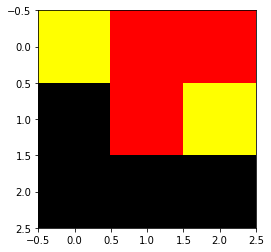

Model prediction: (array([0.11632147, 0.13048843, 0.10626807, 0.12450933, 0.10456548,
       0.10441519, 0.11735147, 0.09070606, 0.10537446], dtype=float32), 0.014026486)
Root value: 0.683530887356028


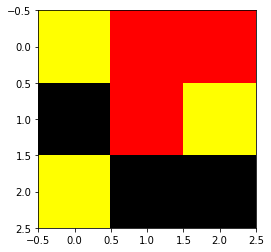

Model prediction: (array([0.10987226, 0.11402062, 0.12673841, 0.11903275, 0.08602902,
       0.10558928, 0.11773616, 0.08758429, 0.13339718], dtype=float32), -0.013223076)


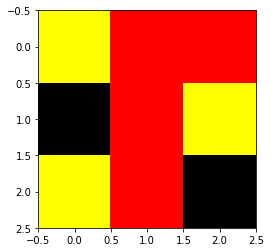

Model prediction: (array([0.11486772, 0.12658674, 0.10000341, 0.1302861 , 0.10620365,
       0.09631152, 0.11759348, 0.09808422, 0.1100632 ], dtype=float32), 0.04505848)
Root value: 0.9531865101711203


In [30]:
state = game.get_init_state()
game.play_vs(model, state, 150)